In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

In [18]:
iris = pd.read_csv("data/IRIS.csv") #data okuması
x = iris.iloc[:, [0, 1, 2, 3]].values #ilk 4 değişkenin yazdırılması için

In [19]:
iris.shape #data framein şeklini kontrol etme

(150, 5)

In [20]:
iris.duplicated().sum() #yinelenen değer kontrolü

3

In [21]:
iris.isnull().sum() #boş değer kontrolü

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
iris.info()#data seti özellikleri
iris[0:5]#10 tane iris çiçeği özniteliklerinin yazdırılması

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#Türlerin frekans dağılımı
iris_outcome = pd.crosstab(index=iris["species"],columns="count")#Çapraz tablo oluşturur
iris_outcome #hangi türden kaç tane olduğu

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


c:\Users\Elif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


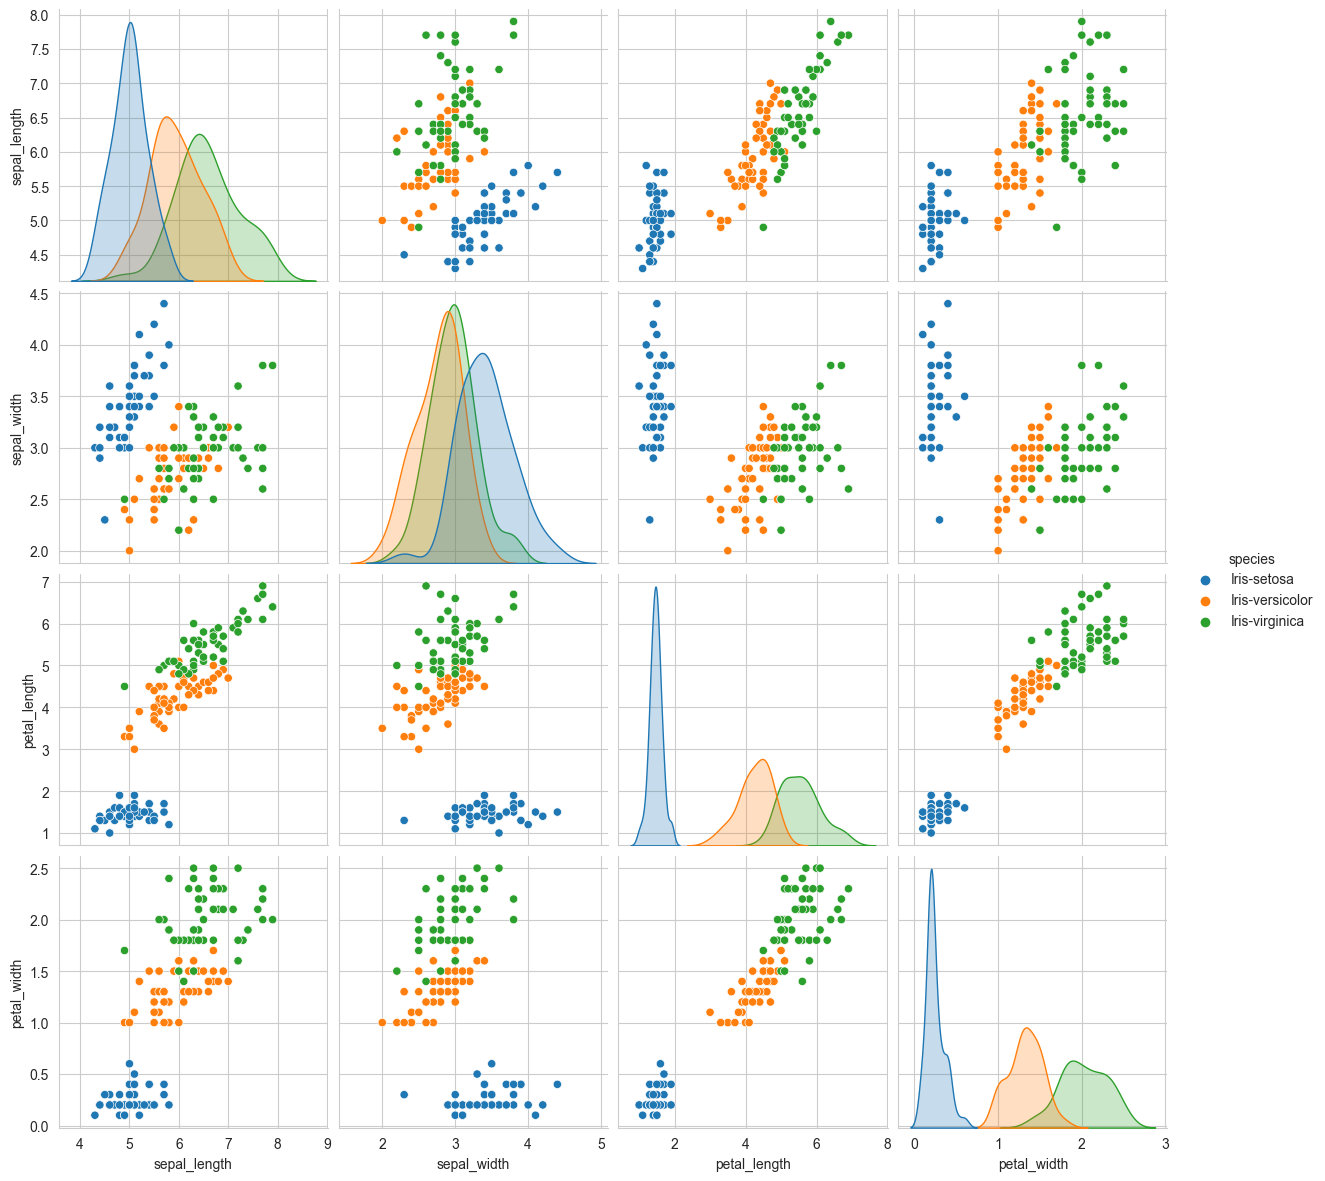

In [24]:
#iris çiçeği türlerine göre veri görselleştirme
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [25]:
#KMEANS için küme sayısı bulma
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


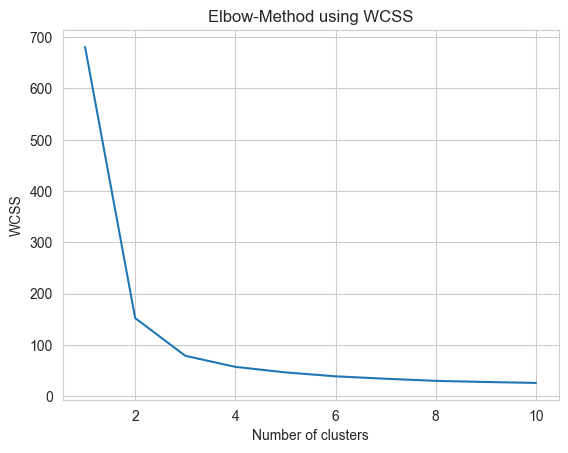

In [26]:
#KMeanste elbow yöntemi kullanımı
plt.plot(range(1, 11), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [28]:
#kmeans clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

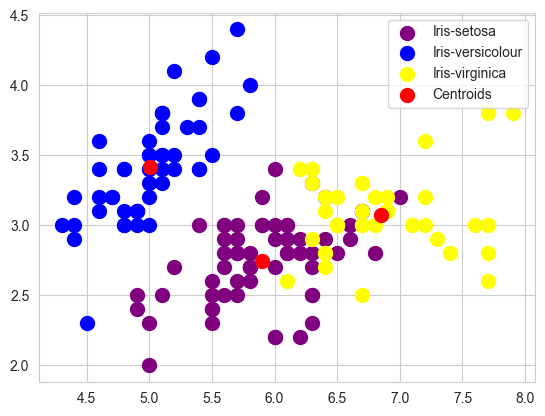

In [29]:
#kümeleri görselleştirme
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')

#küme merkezi çizimi
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

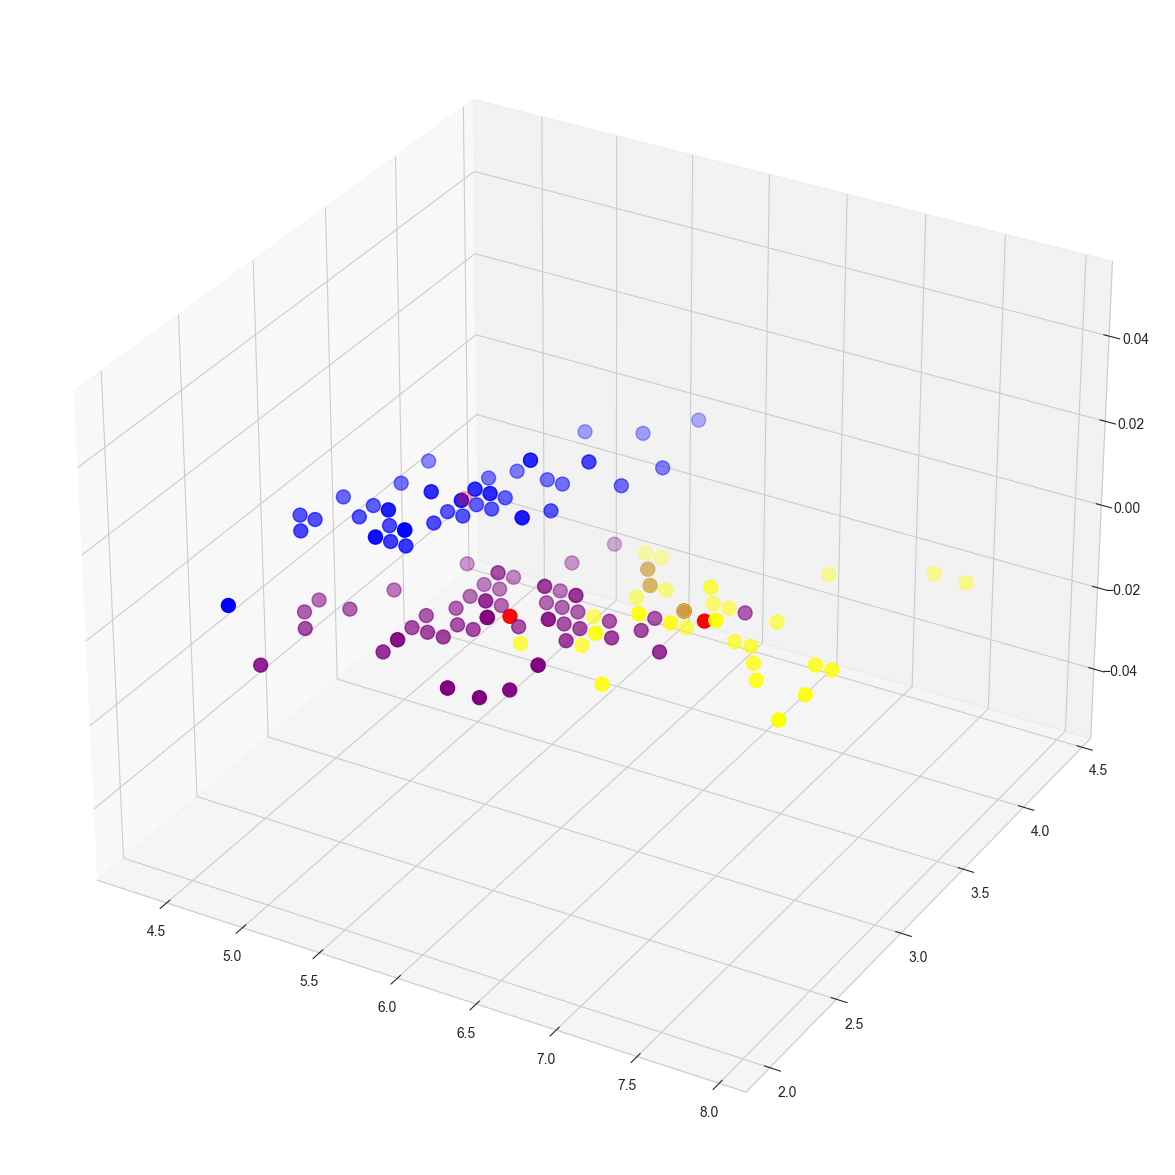

In [30]:
#3 BOYUTLU
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')

#Küme merkezi çizimi
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()